**Theoretical**

1. Can we use Bagging for regression problems?

Yes. Bagging works for regression by training multiple models on different bootstrapped samples. The final prediction is the average of all models’ outputs, which helps reduce variance and improves stability compared to a single model.

2. What is the difference between multiple model training and single model training?

Single model training builds one model on the full dataset. Multiple model training (ensembles) builds several models on different data subsets or with variations, then combines their predictions. Ensembles often perform better due to reduced error and increased robustness.

3. Explain the concept of feature randomness in Random Forest

Random Forest chooses a random subset of features to consider at each split in every tree. This randomness ensures trees are less correlated and more diverse, which improves the overall model’s accuracy and reduces overfitting.

4. What is OOB (Out-of-Bag) Score?

OOB score estimates model performance using the samples not included in each bootstrap training set. These “left-out” samples act like a validation set, providing an unbiased error estimate without needing a separate test set.

5. How can you measure the importance of features in a Random Forest model?

Feature importance can be measured by how much each feature decreases impurity across all trees (mean decrease impurity) or by shuffling feature values and seeing how much model accuracy drops (permutation importance).

6. Explain the working principle of a Bagging Classifier

A Bagging Classifier trains multiple base classifiers on different random subsets of data. Each classifier votes for a class, and the majority vote becomes the final prediction. This reduces variance and improves stability.

7. How do you evaluate a Bagging Classifier’s performance?

Evaluate using metrics like accuracy, precision, recall, F1-score on a test set or validation set. You can also use the Out-of-Bag (OOB) score for an internal estimate of performance without separate validation data.

8. How does a Bagging Regressor work?

It trains several regression models on bootstrapped samples. Each model predicts a value, and the final prediction is the average of these outputs, which reduces variance and improves prediction stability.

9. What is the main advantage of ensemble techniques?

Ensembles combine multiple models to improve accuracy and robustness, reducing overfitting by averaging or voting, leading to better performance on unseen data.

10. What is the main challenge of ensemble methods?

They require more computational resources and can be harder to interpret than single models. Also, if models are not diverse, ensembles might not improve much.

11. Explain the key idea behind ensemble techniques

The key idea is that combining multiple diverse models reduces errors because mistakes by some models are corrected by others, resulting in a stronger overall model.

12. What is a Random Forest Classifier?

A Random Forest is an ensemble of decision trees built on bootstrapped data samples, where each split considers a random subset of features. Final predictions are made by majority voting among trees.

13. What are the main types of ensemble techniques?

Bagging: Parallel training on bootstrapped samples (e.g., Random Forest)

Boosting: Sequential training focusing on correcting previous errors (e.g., AdaBoost)

Stacking: Combining predictions of multiple models via a meta-model.

14. What is ensemble learning in machine learning?

Ensemble learning builds multiple models and combines their outputs to improve prediction accuracy and robustness compared to individual models.

15. When should we avoid using ensemble methods?

Avoid ensembles when interpretability is critical, when data is very small, when computational resources are limited, or when low-latency predictions are needed.

16. How does Bagging help in reducing overfitting?

By training models on different data samples and averaging their predictions, Bagging reduces variance and prevents overfitting to noise in the training data.

17. Why is Random Forest better than a single Decision Tree?

Because it builds many trees with randomness in data and features, reducing overfitting and variance, leading to more accurate and stable predictions than a single tree.

18. What is the role of bootstrap sampling in Bagging?

Bootstrap sampling creates multiple diverse training datasets by sampling with replacement, enabling each model in the ensemble to learn different patterns and reduce correlation.

19. What are some real-world applications of ensemble techniques?

Used in fraud detection, medical diagnosis, credit scoring, stock market prediction, and image or speech recognition for improved accuracy and robustness.

20. What is the difference between Bagging and Boosting?

Bagging trains models independently in parallel and aggregates results to reduce variance. Boosting trains models sequentially, focusing on correcting previous errors to reduce bias and variance.

**Practical**

In [2]:
# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))

Bagging Classifier Accuracy: 1.0


In [4]:
# 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bag_reg.fit(X_train, y_train)

y_pred = bag_reg.predict(X_test)
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred))

Bagging Regressor MSE: 3237.526541353384


In [5]:
# 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

importances = clf.feature_importances_
print("Feature Importances:", importances)

Feature Importances: [0.03484323 0.01522515 0.06799034 0.06046164 0.00795845 0.01159704
 0.06691736 0.10704566 0.00342279 0.00261508 0.0142637  0.00374427
 0.01008506 0.02955283 0.00472157 0.00561183 0.00581969 0.00375975
 0.00354597 0.00594233 0.08284828 0.01748526 0.0808497  0.13935694
 0.01223202 0.01986386 0.03733871 0.13222509 0.00817908 0.00449731]


In [6]:
# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, tree_pred))
print("Random Forest MSE:", mean_squared_error(y_test, forest_pred))


Decision Tree MSE: 0.5280096503174904
Random Forest MSE: 0.25650512920799395


In [9]:
# 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
y_pred = bag_svm.predict(X_test)
print("Bagging SVM Accuracy:", accuracy_score(y_test, y_pred))


Bagging SVM Accuracy: 1.0


In [10]:
# 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy
for n in [10, 50, 100, 200]:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{n} trees - Accuracy:", accuracy_score(y_test, y_pred))


10 trees - Accuracy: 1.0
50 trees - Accuracy: 1.0
100 trees - Accuracy: 1.0
200 trees - Accuracy: 1.0


In [13]:
# 29. Train a Random Forest Regressor and analyze feature importance scores
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
print("Feature Importances:", importances)


Feature Importances: [0.00160391 0.01814557 0.00403745 0.00461822 0.00292849 0.00139949
 0.00291495 0.38764144 0.00203234 0.00335471 0.00937918 0.00250718
 0.00198928 0.01552448 0.00400675 0.0011121  0.00406844 0.00199449
 0.00351347 0.00562097 0.04190978 0.02969984 0.1214353  0.05861028
 0.00878417 0.00187303 0.0216041  0.22910097 0.00491472 0.00367492]


In [15]:
# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bag.fit(X_train, y_train)
bag_acc = accuracy_score(y_test, bag.predict(X_test))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

print("Bagging Accuracy:", bag_acc)
print("Random Forest Accuracy:", rf_acc)


Bagging Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9707602339181286


In [16]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'max_depth': None, 'n_estimators': 50}
Best score: 0.9622920938710413


In [17]:
# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance
for n in [5, 10, 20]:
    bag = BaggingRegressor(n_estimators=n, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    print(f"{n} estimators - MSE:", mean_squared_error(y_test, y_pred))


5 estimators - MSE: 0.04421052631578948
10 estimators - MSE: 0.03923976608187135
20 estimators - MSE: 0.03698830409356725


In [18]:
# 33. Train a Random Forest Classifier and analyze misclassified samples
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
misclassified = X_test[y_pred != y_test]
print("Number of misclassified samples:", len(misclassified))


Number of misclassified samples: 5


In [20]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_acc = accuracy_score(y_test, tree.predict(X_test))

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bag.fit(X_train, y_train)
bag_acc = accuracy_score(y_test, bag.predict(X_test))

print("Decision Tree Accuracy:", tree_acc)
print("Bagging Accuracy:", bag_acc)


Decision Tree Accuracy: 0.9415204678362573
Bagging Accuracy: 0.9473684210526315


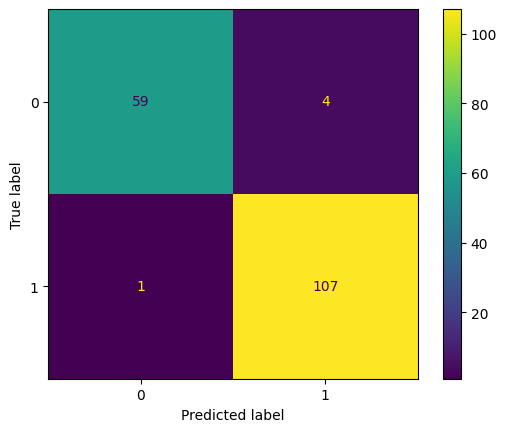

In [21]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)


In [23]:
# 37. Train a Random Forest Classifier and print the top 5 most important features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
top5_idx = importances.argsort()[-5:][::-1]
print("Top 5 Feature Importances:", importances[top5_idx])


Top 5 Feature Importances: [0.14193444 0.12713638 0.11821686 0.08055702 0.07797475]


In [24]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

clf = BaggingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 0.9422459112149533
Recall: 0.9451058201058201
F1 Score: 0.9436366965757188


In [25]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
for depth in [2, 5, 10, None]:
    clf = RandomForestClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"max_depth={depth} - Accuracy:", acc)


max_depth=2 - Accuracy: 0.9532163742690059
max_depth=5 - Accuracy: 0.9649122807017544
max_depth=10 - Accuracy: 0.9707602339181286
max_depth=None - Accuracy: 0.9707602339181286


In [27]:
# 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.neighbors import KNeighborsRegressor

for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    bag = BaggingRegressor(estimator=base, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    print(f"{base.__class__.__name__} - MSE:", mean_squared_error(y_test, y_pred))


DecisionTreeRegressor - MSE: 0.03923976608187135
KNeighborsRegressor - MSE: 0.028180116959064336


In [28]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ROC-AUC Score: 0.9968400940623163


In [29]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validation
from sklearn.model_selection import cross_val_score

clf = BaggingClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())


Cross-validation scores: [0.92982456 0.93859649 0.97368421 0.93859649 0.97345133]
Mean score: 0.9508306163639186


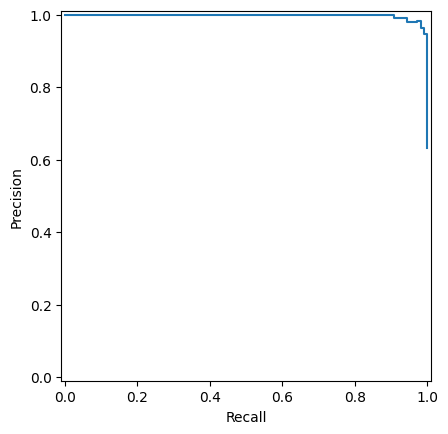

In [30]:
# 43. Train a Random Forest Classifier and plot the Precision-Recall curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


In [32]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance
for bootstrap in [True, False]:
    bag = BaggingRegressor(bootstrap=bootstrap, random_state=42)
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    print(f"Bootstrap={bootstrap} - MSE:", mean_squared_error(y_test, y_pred))


Bootstrap=True - MSE: 0.03923976608187135
Bootstrap=False - MSE: 0.06245614035087719
